
# Youtube Video Analysis

## Import necessary libraries

In [128]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
import calendar
import glob
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

## Data Collection

In [129]:
#read file from the directory

#save path of the directory
path=r"C:\Users\HP-PC\Desktop\Projects\Youtube Trending Video\countries records"

#fetch only .csv file name from the path/directory
files=glob.glob(path+"/*.csv")

#empty Dataframe
df=pd.DataFrame()

for file in files:
    
    #read file and solve utf-8 error by use encoding parameter
    file_data=pd.read_csv(file, encoding='ISO-8859-1')
    
    #create country column and insert country code from file name
    file_data['Country']=file.rsplit('\\',1)[1][:2]
    
    #store data on df
    df=pd.concat([df,file_data])
    
#show first 5 record
print(df.head())

      video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady

## Data Exploration

In [130]:
df.shape

(375942, 17)

In [131]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Country'],
      dtype='object')

## Data Cleaning

In [132]:
# total duplicate records
df.duplicated().sum()

12570

In [133]:
# Delete duplicate records
df=df.drop_duplicates()
df.duplicated().sum()

0

## Check Data

In [134]:
#Check Not null, null and data type of the all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363372 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                363372 non-null  object
 1   trending_date           363372 non-null  object
 2   title                   363372 non-null  object
 3   channel_title           363372 non-null  object
 4   category_id             363372 non-null  int64 
 5   publish_time            363372 non-null  object
 6   tags                    363372 non-null  object
 7   views                   363372 non-null  int64 
 8   likes                   363372 non-null  int64 
 9   dislikes                363372 non-null  int64 
 10  comment_count           363372 non-null  int64 
 11  thumbnail_link          363372 non-null  object
 12  comments_disabled       363372 non-null  bool  
 13  ratings_disabled        363372 non-null  bool  
 14  video_error_or_removed  363372 non-nu

In [135]:
#Change data type
df['trending_date']=pd.to_datetime(df['trending_date'],format='%y.%d.%m')
df['publish_time']=pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363372 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                363372 non-null  object        
 1   trending_date           363372 non-null  datetime64[ns]
 2   title                   363372 non-null  object        
 3   channel_title           363372 non-null  object        
 4   category_id             363372 non-null  int64         
 5   publish_time            363372 non-null  datetime64[ns]
 6   tags                    363372 non-null  object        
 7   views                   363372 non-null  int64         
 8   likes                   363372 non-null  int64         
 9   dislikes                363372 non-null  int64         
 10  comment_count           363372 non-null  int64         
 11  thumbnail_link          363372 non-null  object        
 12  comments_disabled       363372 

In [136]:
df.isna().sum()


video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               18681
Country                       0
dtype: int64

In [137]:
df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               18681
Country                       0
dtype: int64

### Delete Unwanted Columns

In [138]:
df.drop(columns=['thumbnail_link','description','comments_disabled', 'ratings_disabled', 'video_error_or_removed'], inplace=True)

In [139]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'Country'],
      dtype='object')

### Add Categories into the tablefrom json file

In [140]:
df['Publish Time']=df['publish_time'].dt.time
df['Publish Date']=pd.to_datetime(df['publish_time'].dt.date)
df[['Publish Time','Publish Date']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363372 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   video_id       363372 non-null  object        
 1   trending_date  363372 non-null  datetime64[ns]
 2   title          363372 non-null  object        
 3   channel_title  363372 non-null  object        
 4   category_id    363372 non-null  int64         
 5   publish_time   363372 non-null  datetime64[ns]
 6   tags           363372 non-null  object        
 7   views          363372 non-null  int64         
 8   likes          363372 non-null  int64         
 9   dislikes       363372 non-null  int64         
 10  comment_count  363372 non-null  int64         
 11  Country        363372 non-null  object        
 12  Publish Time   363372 non-null  object        
 13  Publish Date   363372 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(5), object(6)
memory usag

In [141]:
import json
#create empty dictionary
id_to_category={}

#read file and insert data into dictionary
with open(r'C:\Users\HP-PC\Desktop\Projects\Youtube Trending Video\countries records\US_category_id.json', encoding='latin1') as cat:
    category=json.load(cat)
    for c in category['items']:
        id_to_category[c['id']]=c['snippet']['title']
id_to_category


{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [142]:
#create new column Category
df['category_id']=df['category_id'].values.astype(str)
df["Category"]=df['category_id'].map(id_to_category)
#df.insert(4, 'Category', df['category_id'].map(id_to_category))
df[['category_id', 'Category']]


,category_id,Category
0,10,Music
1,23,Comedy
2,23,Comedy
3,24,Entertainment
4,10,Music
...,...,...
40944,15,Pets & Animals
40945,22,People & Blogs
40946,24,Entertainment
40947,1,Film & Animation


In [143]:
#show first 5 records
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,Country,Publish Time,Publish Date,Category
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,CA,17:00:03,2017-11-10,Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,CA,17:00:00,2017-11-13,Comedy
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,CA,19:05:24,2017-11-12,Comedy
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,CA,18:01:41,2017-11-12,Entertainment
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,CA,11:04:14,2017-11-09,Music


## Create Functions

In [144]:

def avg_barplot(group_col,numeric_col,title=""):
    #fig, [[ax1, ax2], [ax3, ax4]] = mpl.subplots(ncols=2,nrows=2, figsize=(15,10))
    mpl.figure(figsize=(13,4))
    ndf=df.groupby(group_col)[numeric_col].mean().nlargest(10).reset_index()
    sb.set_palette("pastel") #a. is not working #, palette,icefire,Accent,Blues,Greens_r
    a=sb.barplot(data=ndf,y=group_col,x=numeric_col)
    a.set_title(title, fontdict={'size':25,'weight':'bold','color':'k'})
    a.set_ylabel("")
    a.set_xlabel(numeric_col,fontdict={'size':20,'weight':'bold','color':'k'})
    
    #a.set_facecolor("lightyellow")
    for count in a.containers:
        a.bar_label(count)

In [145]:
def dates_chart(day,title='',xticklabels='',xtrick=''):
    #using lineplot
    #day.value_counts().nlargest(12).plot(kind='line')
    mpl.figure(figsize=(13,4))
    day=day.value_counts().nlargest(12)
    #day=day.sort_index()
    sb.set_style('darkgrid')
    if(xticklabels==''):
        sb.lineplot(x=day.index, y=day.values, marker='h',markersize=8).set(title=title)
    else:
        sb.lineplot(x=day.index, y=day.values, marker='h',markersize=8).set(title=title,xticklabels=xticklabels)
         
        #sb.set_xticklabels(xtricks) #not workingxtrick
    mpl.show()

In [146]:
def dates_views(day,views,title='',xlabel='',xticklabels=''):
    
    
    mpl.figure(figsize=(13,4))
    sb.set(style='whitegrid')
    a=sb.scatterplot(x=day, y=views)
    mpl.title(title, fontdict={'size':25,'weight':'bold','color':'k'})
    mpl.xlabel(xlabel)
    if(xticklabels!=''):
        a.set_xticklabels(xticklabels)
    mpl.show()
    

# Data Visualization

## 1. Category Analysis

### Average of the likes, dislike,views and comment of the top 10 Categories

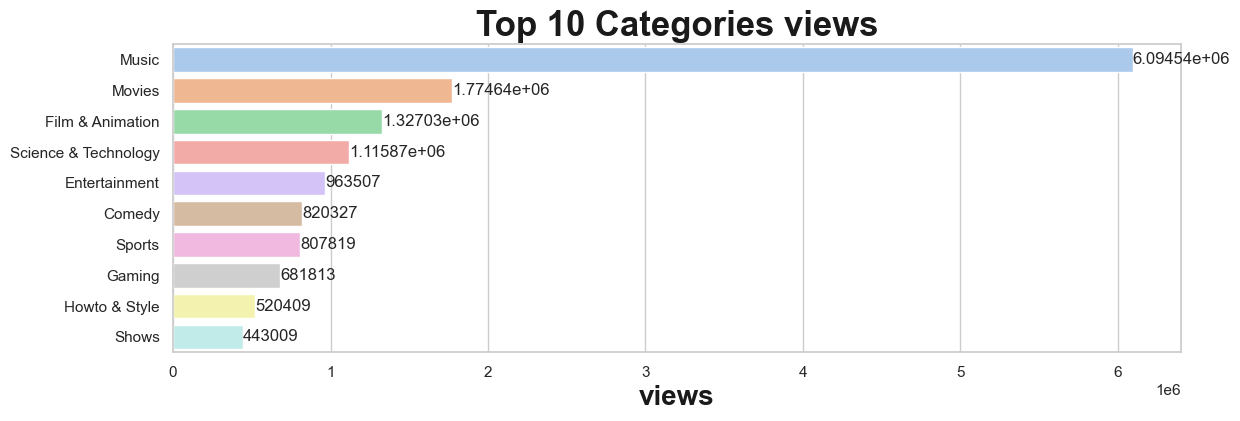

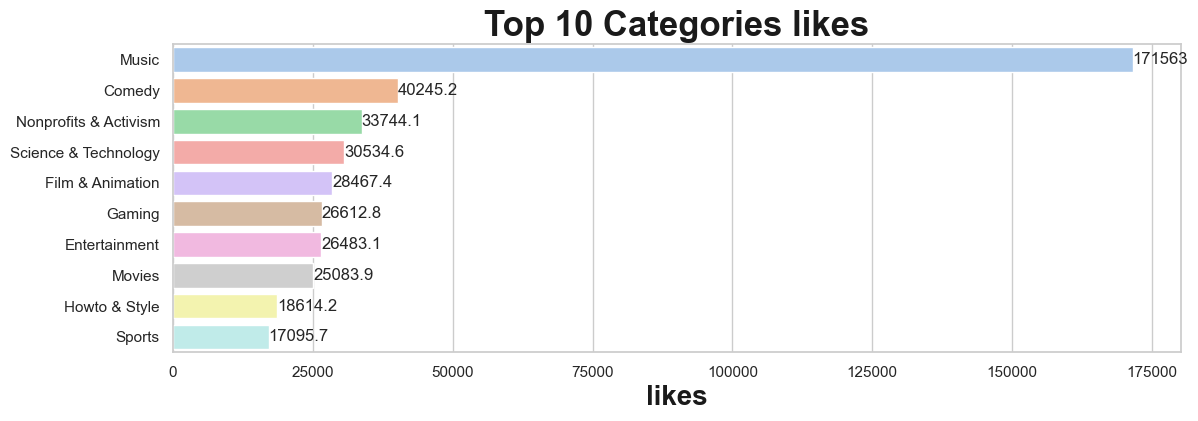

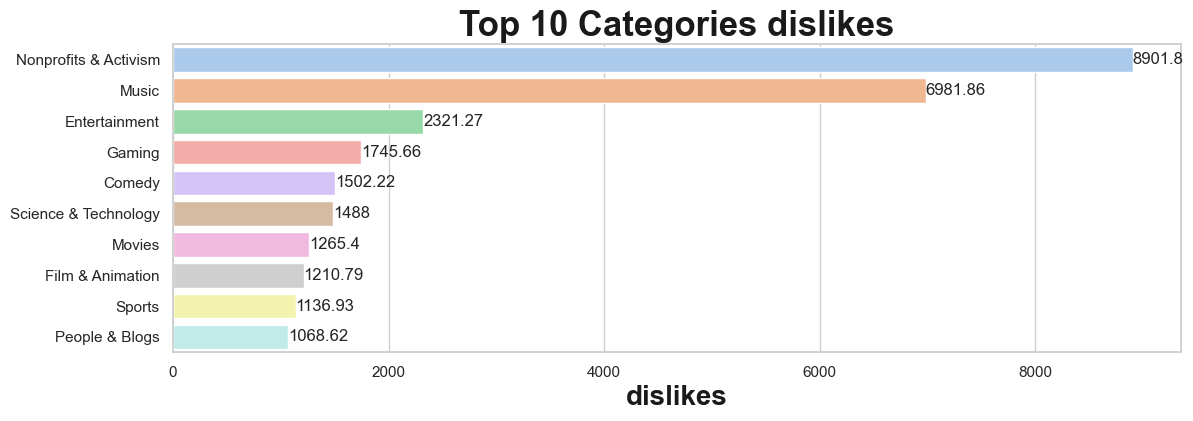

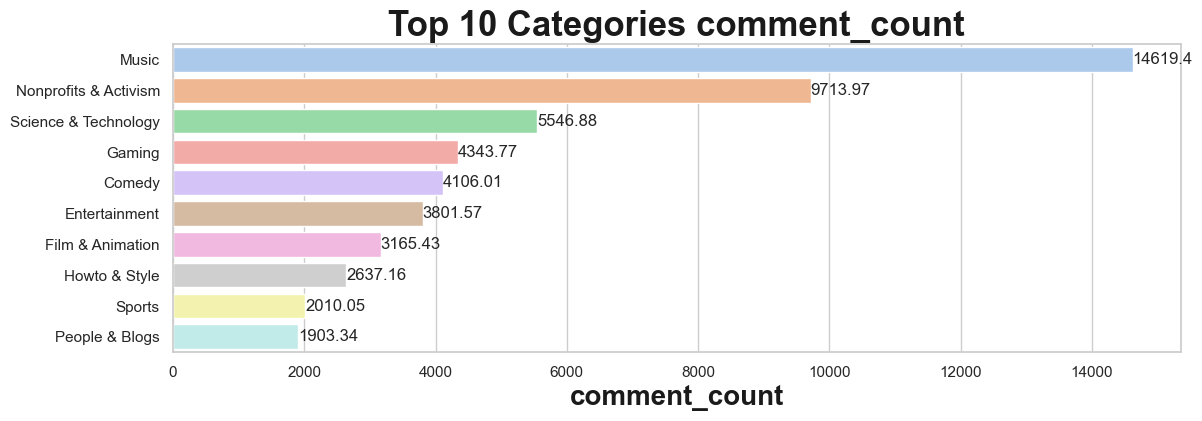

In [147]:
columns=['views','likes','dislikes','comment_count']
for c in columns:
    title=f'Top 10 Categories {c}'
    avg_barplot('Category',c,title)

#### <h4> Conclusion :</h4>
    - Music is the viral category which is most viewed and liked by people. Nonprofit and activism is most disliked by peolpe.
    - My Analysis says that 'music' and 'nonprofit and activism' are the category where people are more engaed.

### Categories have the highest number of trending videos

In [148]:
categories=df['Category'].value_counts()
fig=px.pie(values=categories.values,
          names=categories.index,
          color_discrete_sequence=px.colors.sequential.speed,
          title="Categories of Youtube Channels" , template='presentation'
          )
fig.update_traces(textposition='inside',
                  textfont_size=8,
                  textinfo='percent+label')
fig.show();

#### <h4> Conclusion :</h4>
    - Entertainment category has most video in youtube

## 2. Time Analysis

## a. Trainding Time Analysis

### Top 10 tranding times, dates, day, year and full dates of the videos 

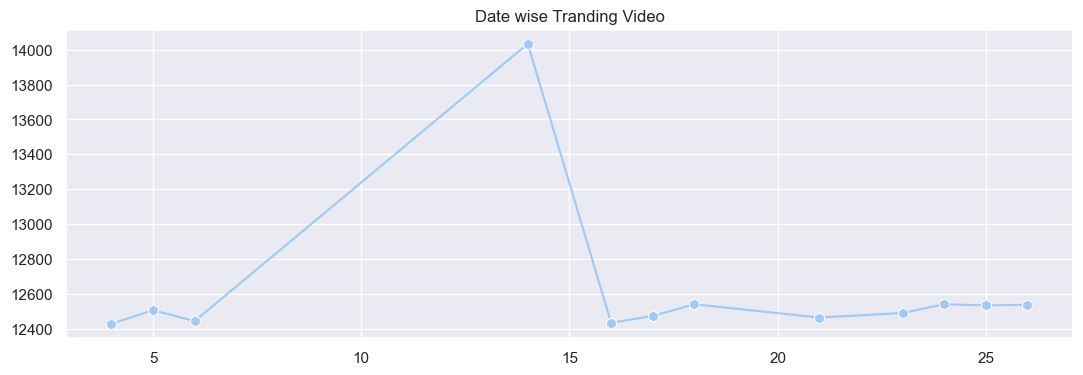

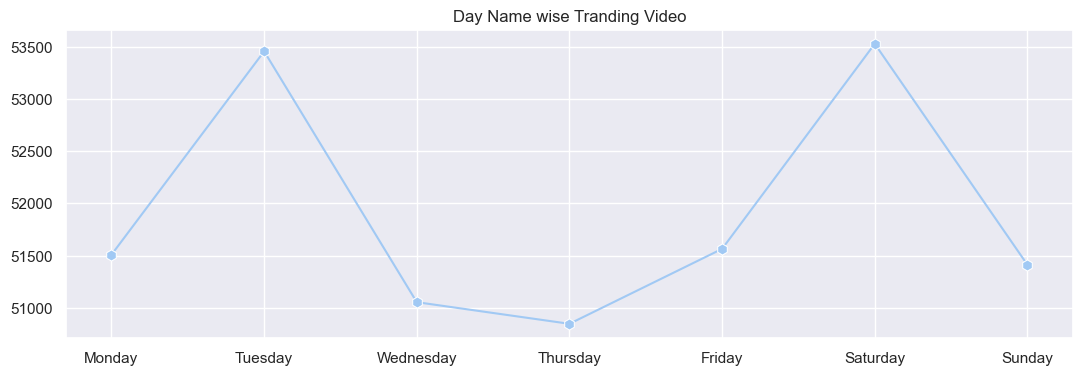

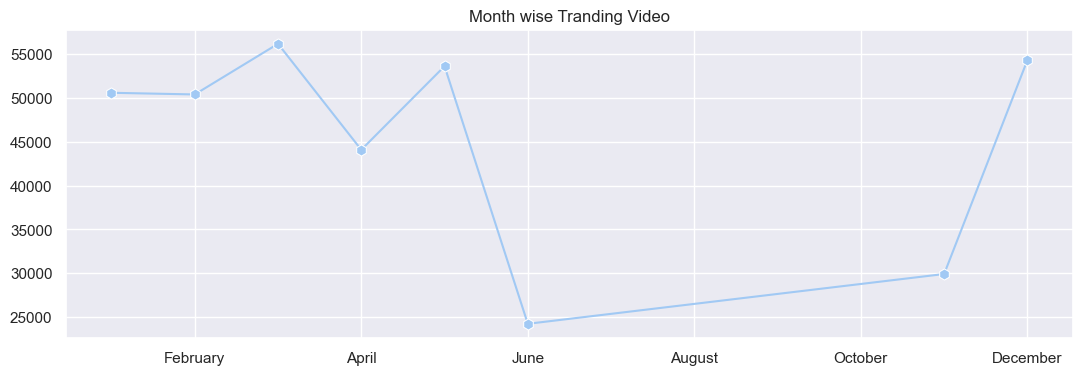

In [149]:
#create list    
l=[df['trending_date'].dt.day,df['trending_date'].dt.dayofweek,df['trending_date'].dt.month]

for index,i in enumerate(l):
    title=xlable=""
    if(index==0):
        title="Date wise Tranding Video"
    elif(index==1):
        title="Day Name wise Tranding Video"
        xlable = [0]+list(calendar.day_name)
    elif(index==2):
        title="Month wise Tranding Video"
        #l=list(calendar.month_name)
        xlable=['January','February','April','June','August','October','December']
    else:
        title="Date wise Tranding Video"
        #xticklabels
    
    dates_chart(i,title,xlable)
    

#### Conclusion : Mostly treanding video is in winter season

### Top 10 timimg, dates, day, year and full dates where most videos are published

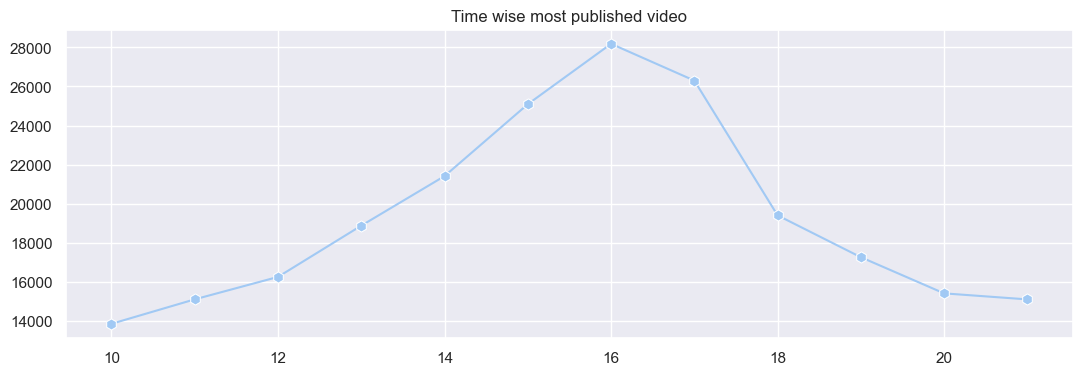

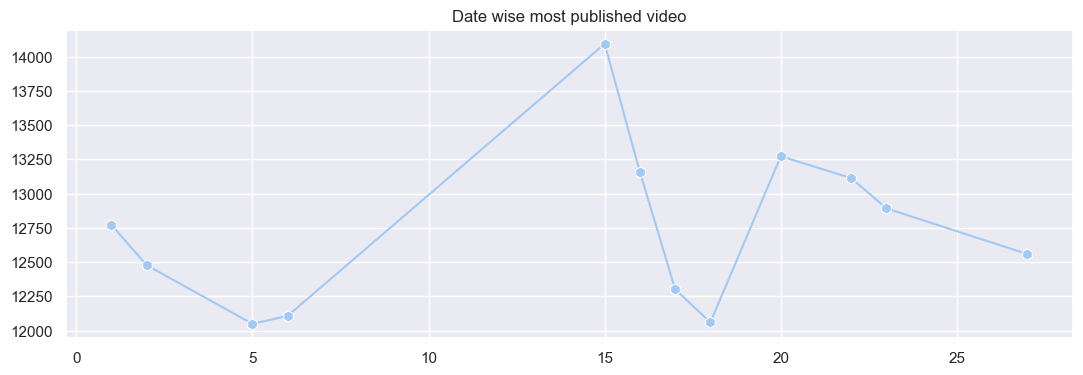

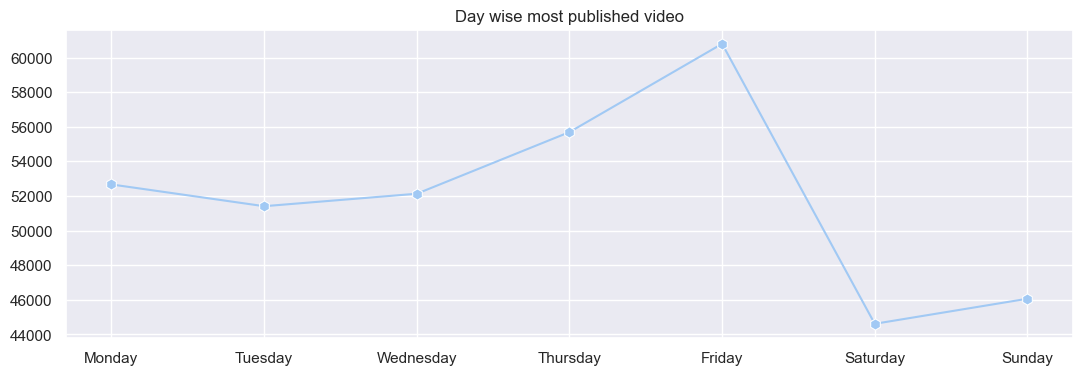

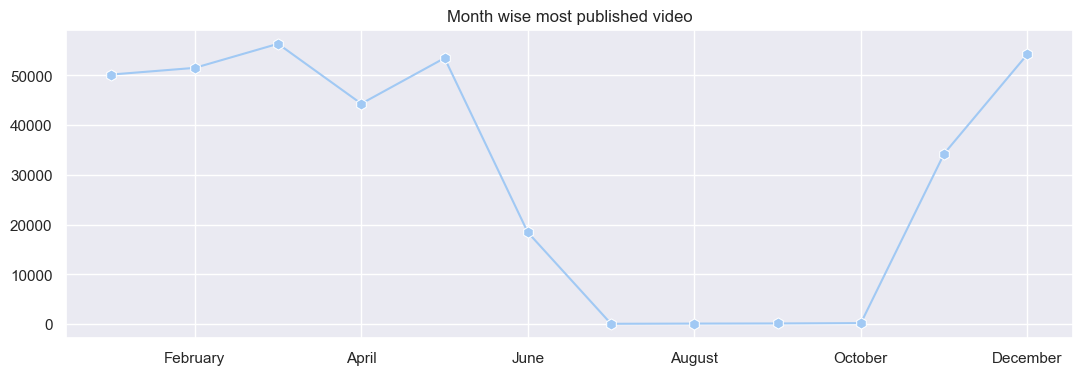

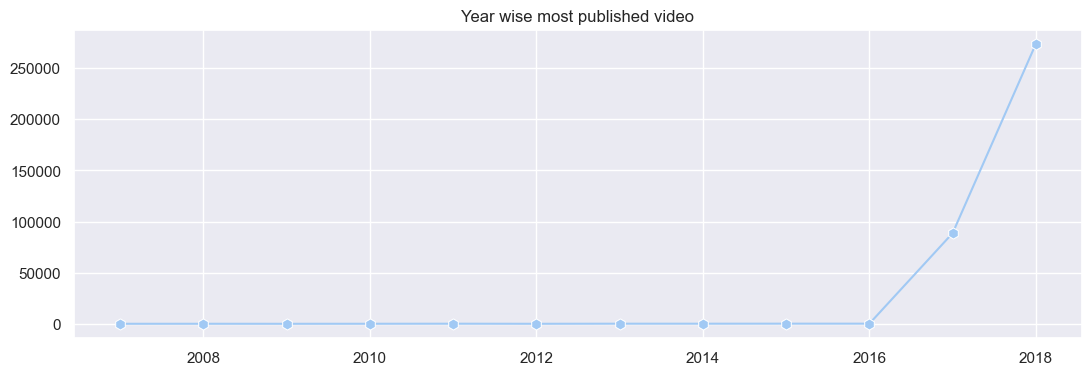

In [150]:

    
l=[df['publish_time'].dt.hour,df['publish_time'].dt.day,df['publish_time'].dt.dayofweek,df['publish_time'].dt.month,df['publish_time'].dt.year]

for index,i in enumerate(l):
    title=xlable=""
    if(index==0):
        title="Time wise most published video"
    elif(index==1):
        title="Date wise most published video"
    elif(index==2):
        title="Day wise most published video"
        xlable = [0]+list(calendar.day_name)
    elif(index==3):
        title="Month wise most published video"
        xlable=['January','February','April','June','August','October','December']
    else:
        title="Year wise most published video"
        xlable=""
        #xticklabelsxticklabels
    dates_chart(i,title,xlable)


#### Conclusion
    - Videos start going viral from 12 noon and 4 pm has been the best time for videos to go viral.

    - Most of the videos have gone viral on 15th. 15 and 20 have been the best dates for videos to go viral.

    - Tuesday and Saturday are the best days to be a video trend

    - November to May is the best month for trending videos

    - Most viral videos in 2018

## b. Published video's timimg

### Top 10 timimg, dates, day, year and full dates where most published videos are viewed

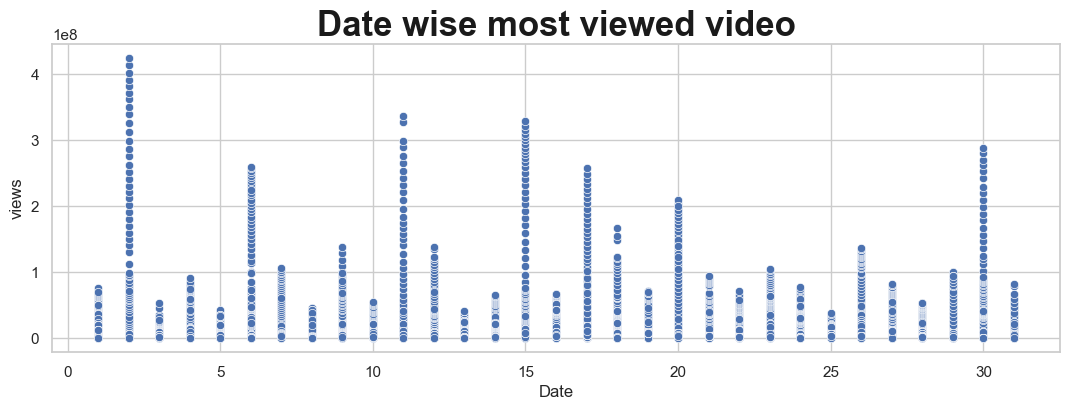

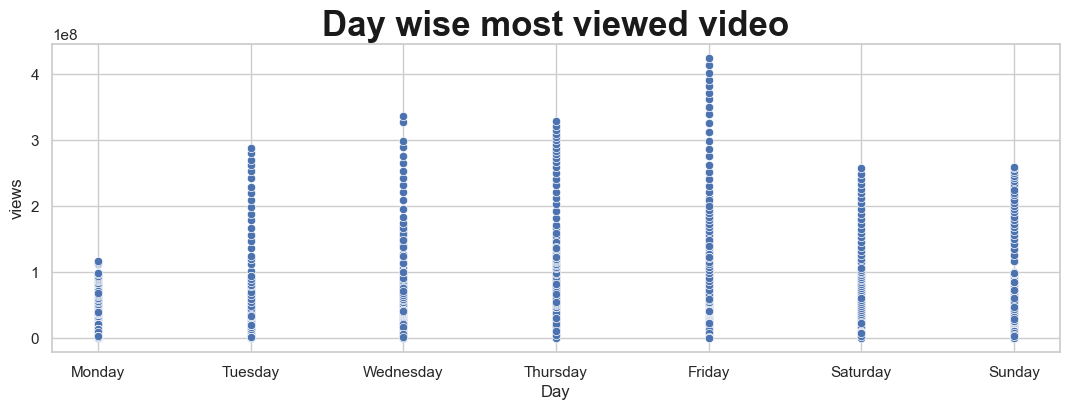

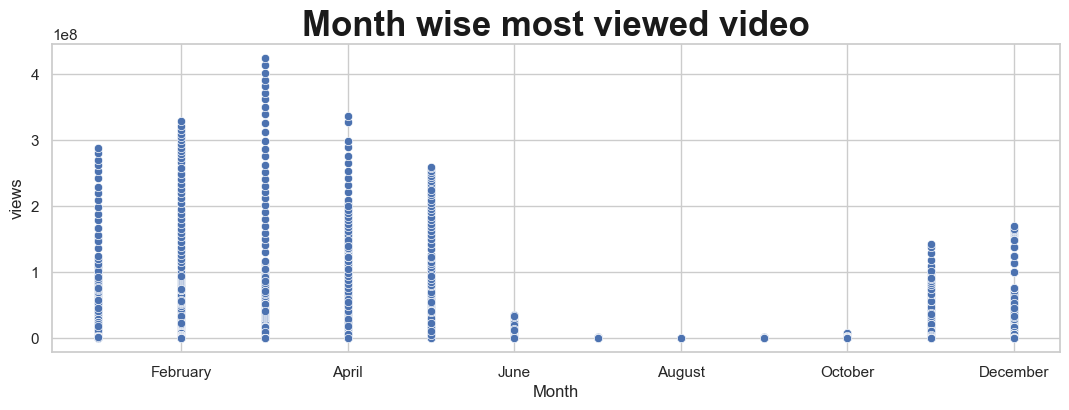

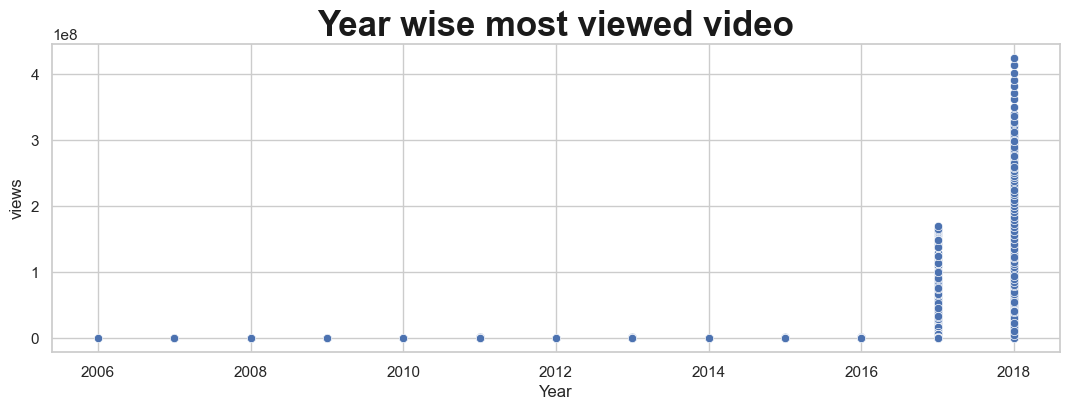

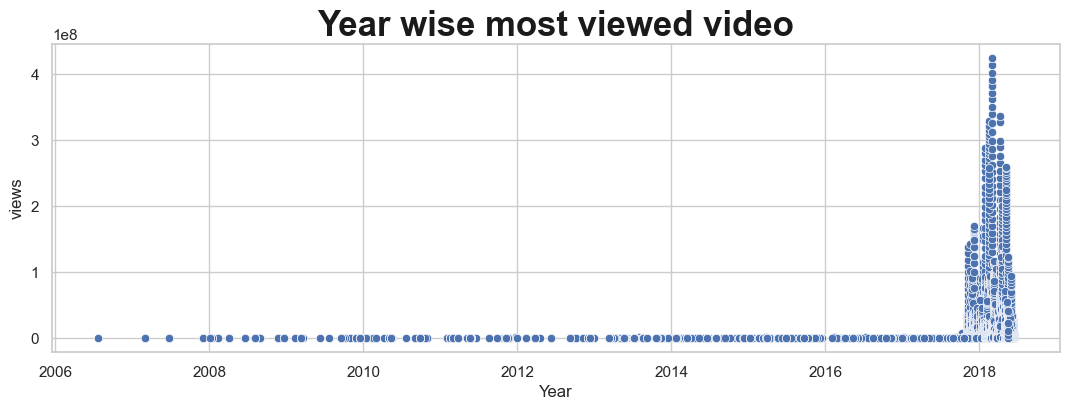

In [151]:
#show date wise views video
l=[df['publish_time'].dt.day,df['publish_time'].dt.dayofweek,df['publish_time'].dt.month,df['publish_time'].dt.year,df['publish_time'].dt.date]
#l=[df['publish_time'].dt.hour,df['publish_time'].dt.day,df['publish_time'].dt.dayofweek,df['publish_time'].dt.month,df['publish_time'].dt.year]

for index,i in enumerate(l):
    title=xlabel=xticklabels=""
    if(index==0):
        title="Date wise most viewed video"
        xlabel="Date"
    elif(index==1):
        title="Day wise most viewed video"
        xlabel="Day"
        xticklabels = [0]+list(calendar.day_name)
    elif(index==2):
        title="Month wise most viewed video"
        xlabel="Month"
        xticklabels=['January','February','April','June','August','October','December']
    else:
        title="Year wise most viewed video"
        xlabel="Year"
    #xticklabels
    dates_views(i,df['views'],title,xlabel,xticklabels)
   # dates_views(i,df['views'],df['likes'],df['dislikes'])


## 3. Engagement Metrics:

### Generate a scatter plot or bubble plot to display the relationship between views and likes/dislikes/comments

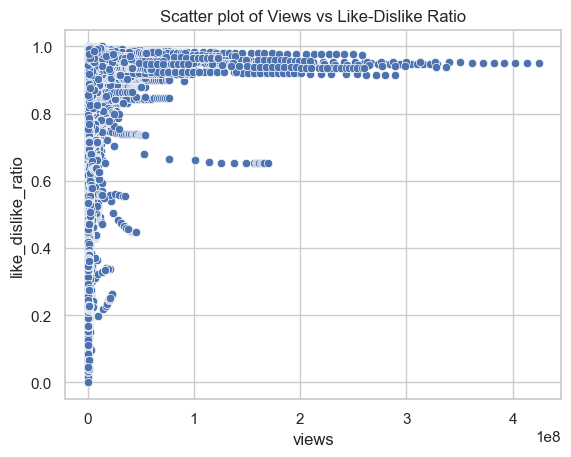

In [152]:
df['like_dislike_ratio'] = df['likes'] / (df['likes'] + df['dislikes'])
sb.scatterplot(x='views', y='like_dislike_ratio', data=df)
mpl.title("Scatter plot of Views vs Like-Dislike Ratio")
mpl.show()


## 4. Channel Analysis

### Which channels have the most trending videos?

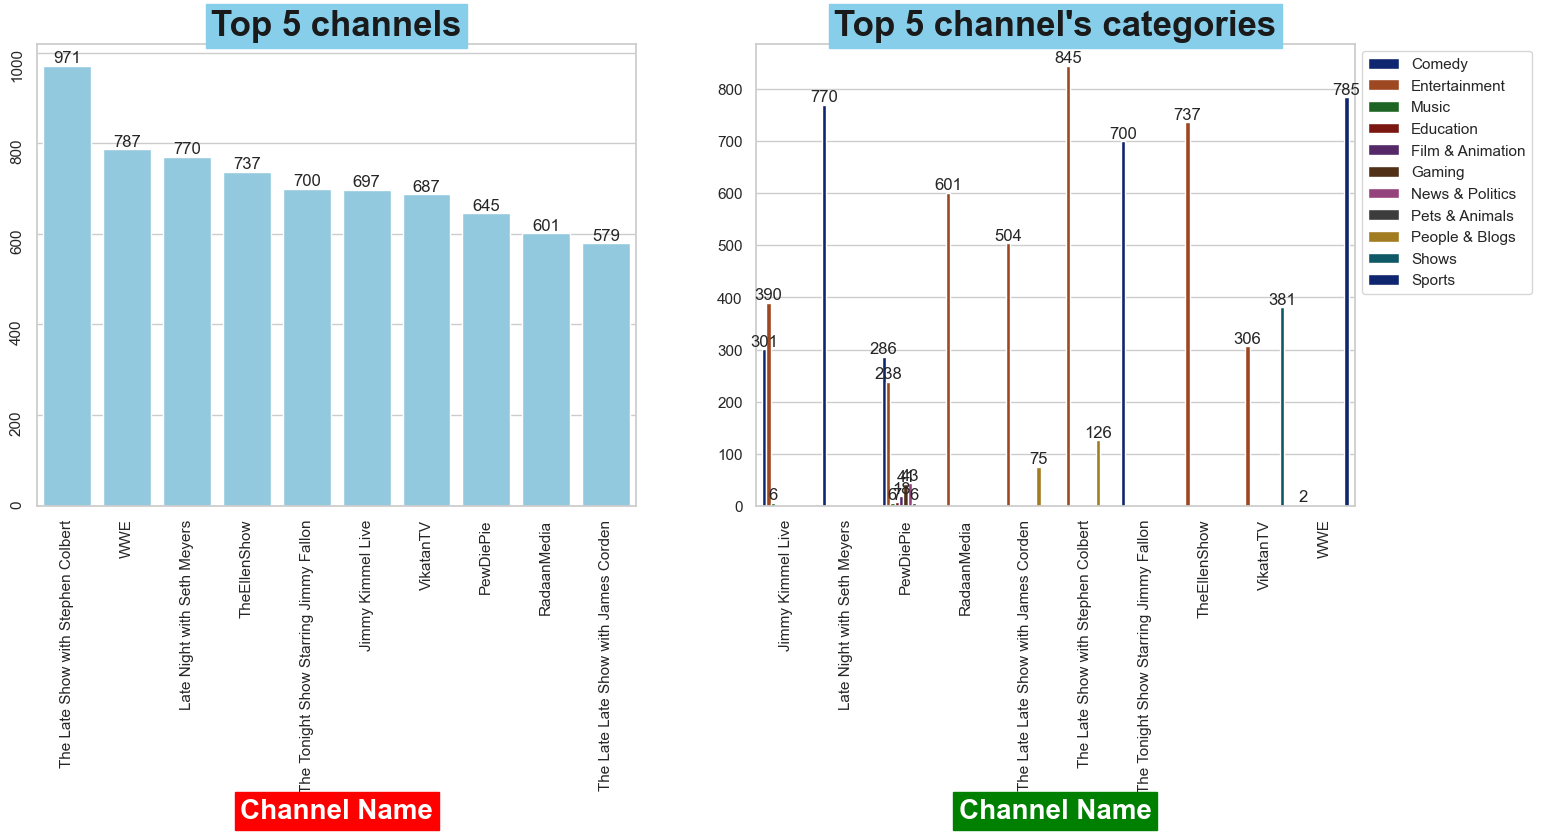

In [153]:
title_style={'size':25,'weight':'bold','color':'k','backgroundcolor':'skyblue'}
fig,axes=mpl.subplots(1,2,figsize=(17,6))
#first Chart
ndf=df.groupby(['channel_title']).agg(
    countChannel=('channel_title','count')
).reset_index()
ndf=ndf.nlargest(n=10,columns='countChannel')
sb.barplot(data=ndf,x=ndf['channel_title'],y=ndf['countChannel'],ax=axes[0],color="skyblue")
axes[0].set_title("Top 5 channels", fontdict=title_style)
axes[0].tick_params(labelrotation=90)
axes[0].set_ylabel("")
axes[0].set_xlabel("Channel Name",fontdict={'size':20,'weight':'bold','color':'white','backgroundcolor':'red'})
for count in axes[0].containers:
        axes[0].bar_label(count)
#Second Chart

mdf=pd.DataFrame()
for c in ndf['channel_title']:
    a=df.loc[df['channel_title']==c]
    mdf=pd.concat([mdf,a])

ndf=mdf.groupby(['channel_title','Category']).agg(
        countChannel=('channel_title','count')
    ).reset_index()

sb.barplot(data=ndf,x=ndf['channel_title'],y=ndf['countChannel'],hue="Category",ax=axes[1],palette="dark")
#,color=['red','green','grey','yellow','pink','blue','purple','orange','black','skyblue','navyblue']


axes[1].set_title("Top 5 channel's categories", fontdict=title_style)
axes[1].set_ylabel("")
mpl.xticks(rotation=90)
axes[1].set_xlabel("Channel Name",fontdict={'size':20,'weight':'bold','color':'white','backgroundcolor':'green'})
for count in axes[1].containers:
        axes[1].bar_label(count)

mpl.legend(bbox_to_anchor=(1,1))
mpl.show()

#### Conclusion:
    - "The Late Show with Stephen colbert" channel is most liked by people.

## 5. Tag Analysis

### Top 20 tags

In [154]:
#First method
a=df["tags"].str.split("|").explode().reset_index()
ndf = a.pivot_table(index = ["tags"], aggfunc ='size')

#romeve none value
ndf=ndf.nlargest(11).nsmallest(10)

import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=ndf.index, y=ndf.values, name= "line3", mode = "lines+markers"))

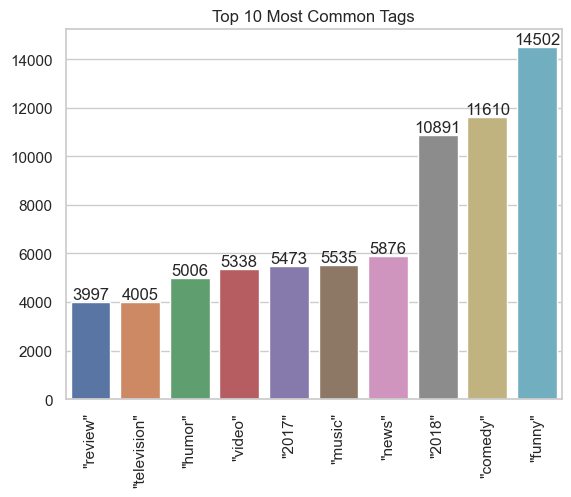

In [155]:
# Second Method
all_tags = '|'.join(df['tags']).split('|')
tag_counts = pd.Series(all_tags).value_counts()[:11].nsmallest(10)
a=sb.barplot(x=tag_counts.index, y=tag_counts.values)
for count in a.containers:
        a.bar_label(count)
mpl.xticks(rotation=90)

mpl.title("Top 10 Most Common Tags")
mpl.show()

#### Conclusion:
    - Funny and comedy are viral tags

## 6. Time Analysis

### Show when videos are most commonly published in terms of day and time.

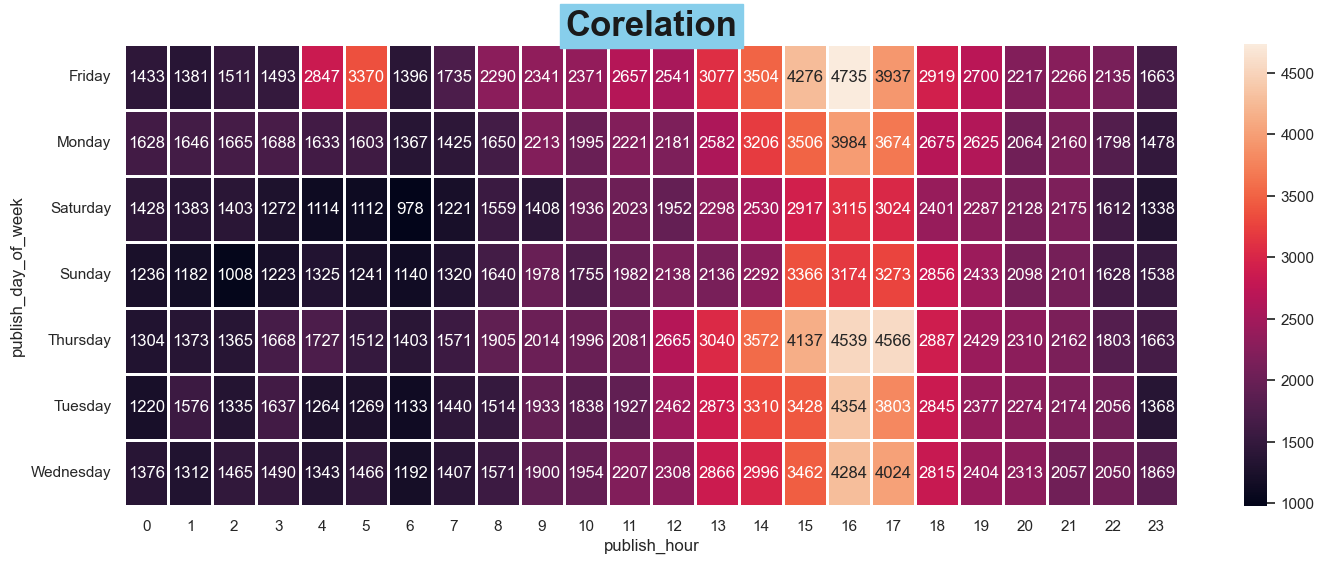

In [156]:
ndf=df[['video_id','publish_time']]

ndf['publish_hour'] = ndf['publish_time'].dt.hour
ndf['publish_day_of_week'] = ndf['publish_time'].dt.day_name()

ndf = ndf.groupby(['publish_day_of_week', 'publish_hour'])['video_id'].count().unstack()
#ndf=ndf.pivot('publish_day_of_week','publish_hour','video_id')
mpl.figure(figsize=(17,6))
sb.heatmap(ndf, annot=True,linewidths=2, fmt='d').set_title("Corelation", fontdict=title_style)
mpl.show()

#### Conclusion:
    - Mostly videos are published in date 15,16,17 and weekday

## 6. Likes, Dislikes, and Comments Analysis

## Average of the likes, dislike,views and comment of the top 10 channels

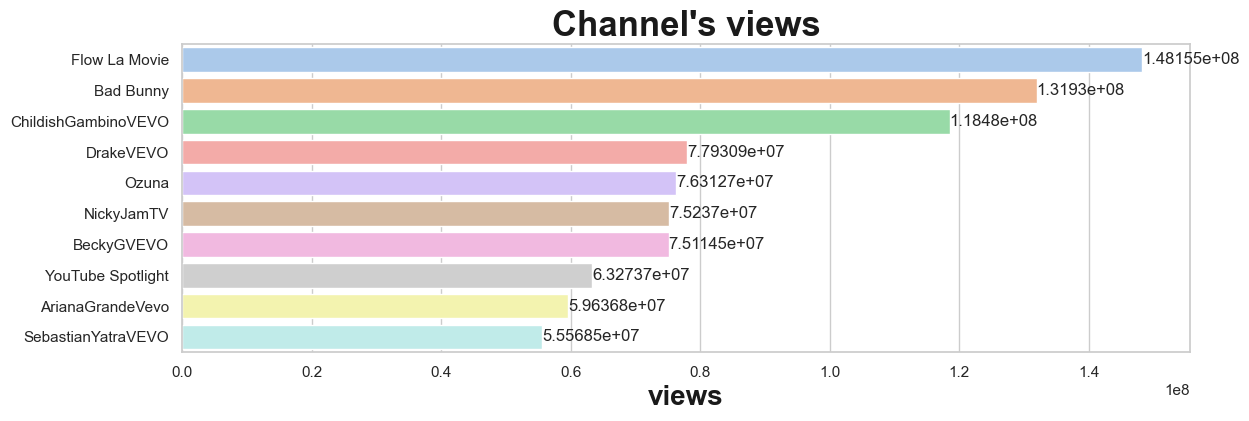

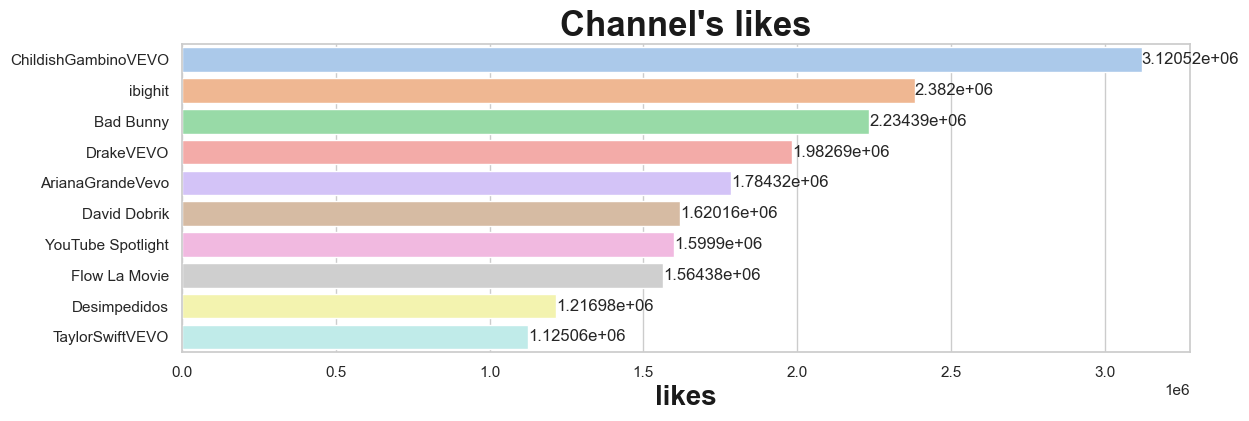

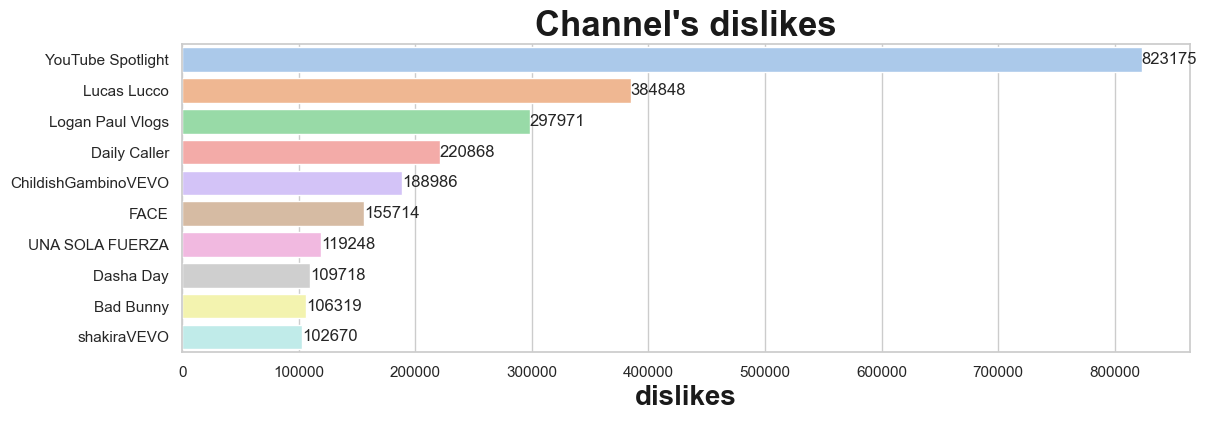

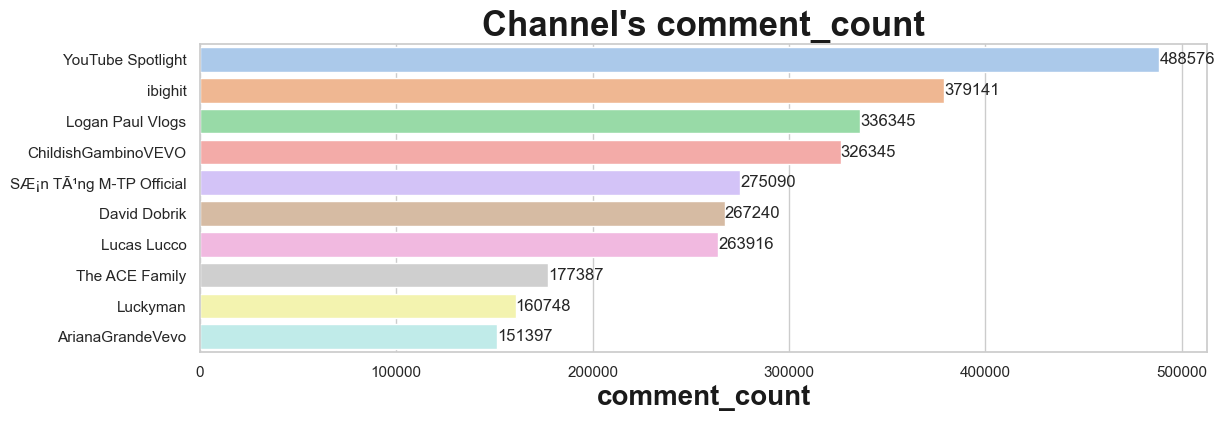

In [157]:
columns=['views','likes','dislikes','comment_count']
for c in columns:
    title=f"Channel's {c}"
    avg_barplot('channel_title',c,title,)

## How many likes, dislikes, views and comments get by different countries?

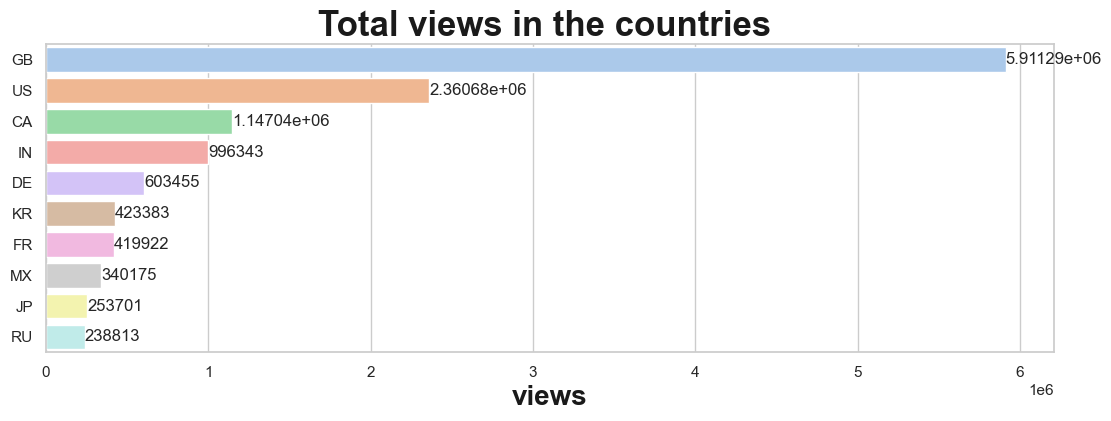

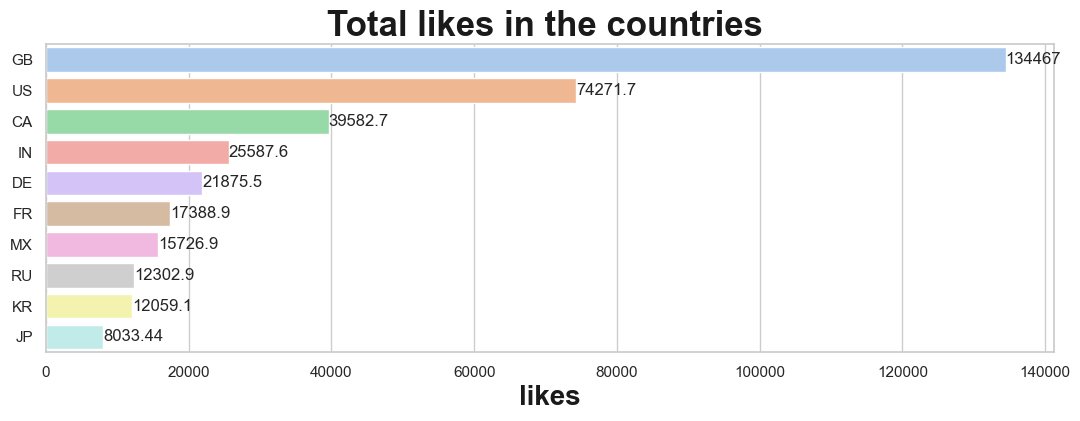

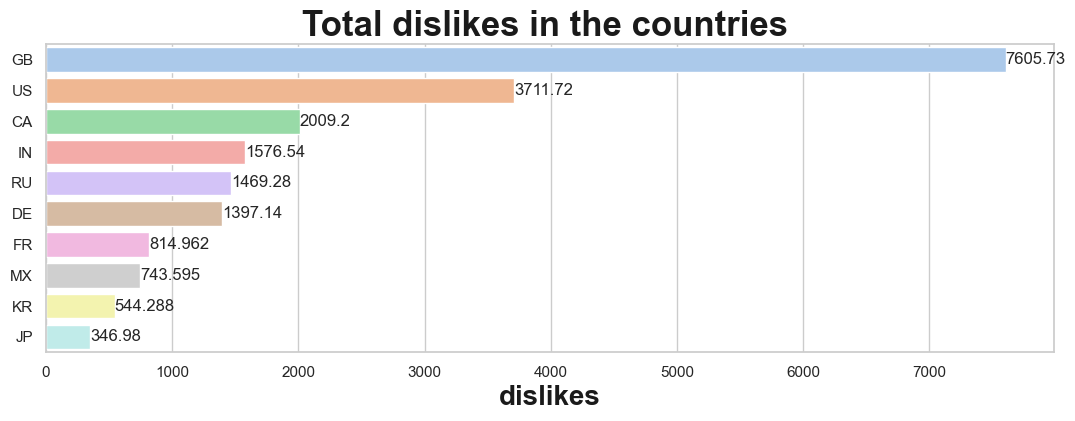

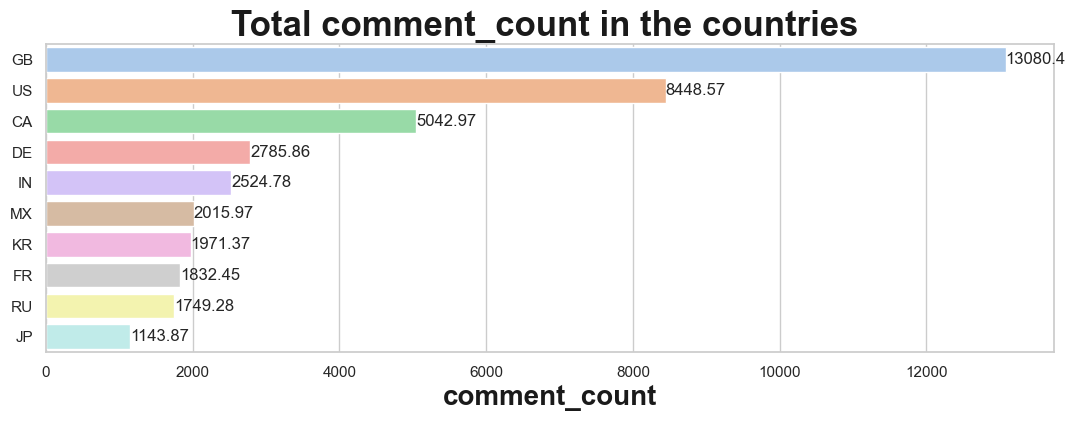

In [158]:
#create list
columns=['views','likes','dislikes','comment_count']

for c in columns:
    title=f"Total {c} in the countries "
    #call function
    avg_barplot('Country',c,title)
    

## 7. Country wise Analysis

## Ratio of the video in all country

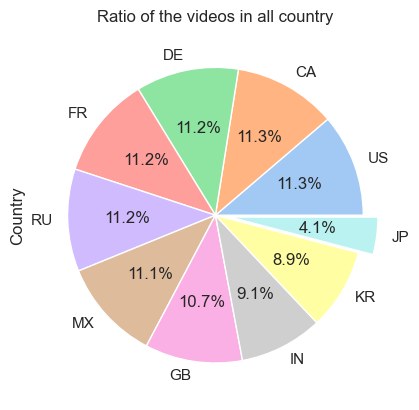

In [159]:
#first method
# ndf=df.groupby(["Country"])['video_id'].count()
# label=ndf.index
# ndf.plot(kind='pie',labels=label, autopct='%1.1f%%')

#second Method
df['Country'].value_counts().plot(kind='pie',labels=df['Country'].value_counts().index,
                                  autopct='%1.1f%%',explode = (0, 0, 0, 0,0,0,0,0,0,0.1),
                                  title="Ratio of the videos in all country")
mpl.show()

## 8. Title Analysis

### Top 10 title of the youtube video

Text(0.5, 0, '')

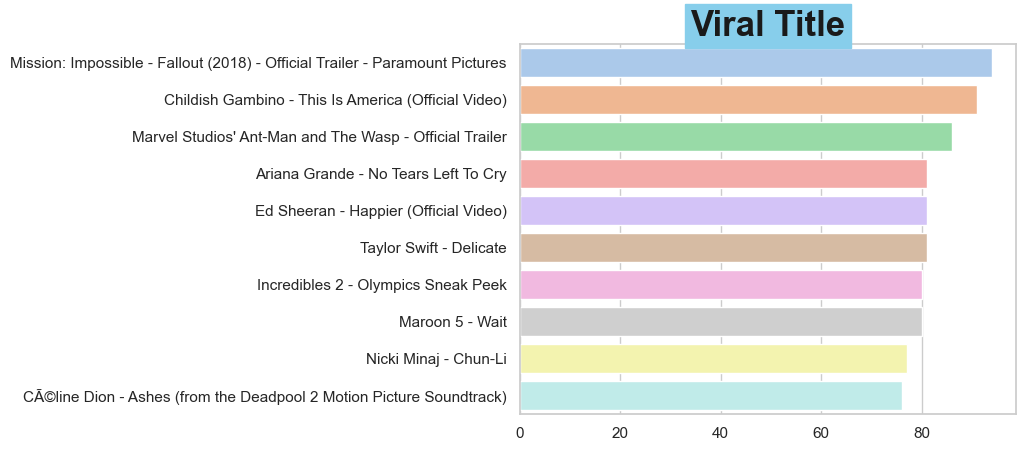

In [160]:
ndf=df.groupby(['title']).agg(
    countVideo=('title','count')
).reset_index()
ndf=ndf.nlargest(n=10,columns='countVideo')

sb.barplot(data=ndf,y=ndf['title'],x=ndf['countVideo']).set_title("Viral Title", fontdict=title_style)
mpl.ylabel("")
mpl.xlabel("")


### Most viral titles are in which conuntry?

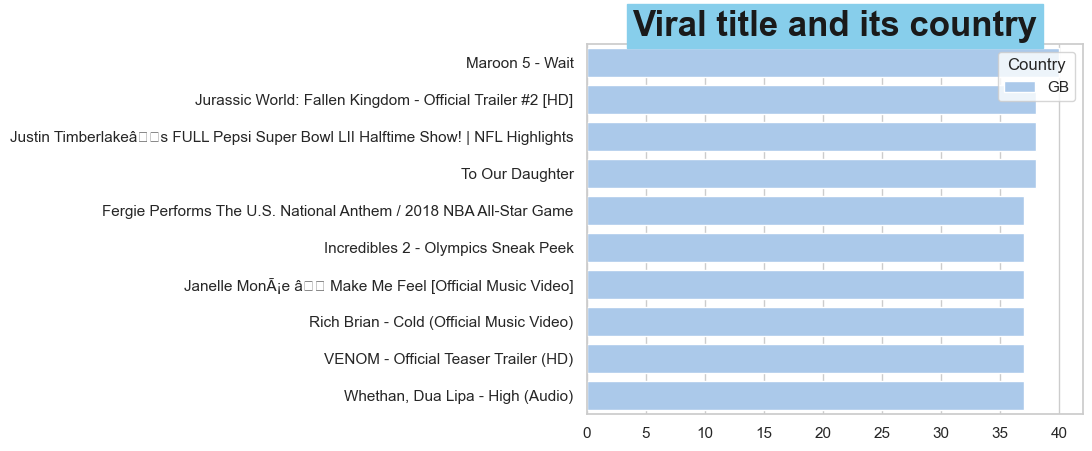

In [161]:
ndf=df.groupby(['title','Country']).agg(
    countVideo=('title','count')
).reset_index()

ndf=ndf.nlargest(n=10,columns='countVideo')
ndf
sb.barplot(data=ndf,y=ndf['title'],x=ndf['countVideo'], hue='Country').set_title("Viral title and its country", fontdict=title_style)
mpl.ylabel("")
mpl.xlabel("")
mpl.show()

## 8. Some Important Analysis

## Categories of trend video in all countries

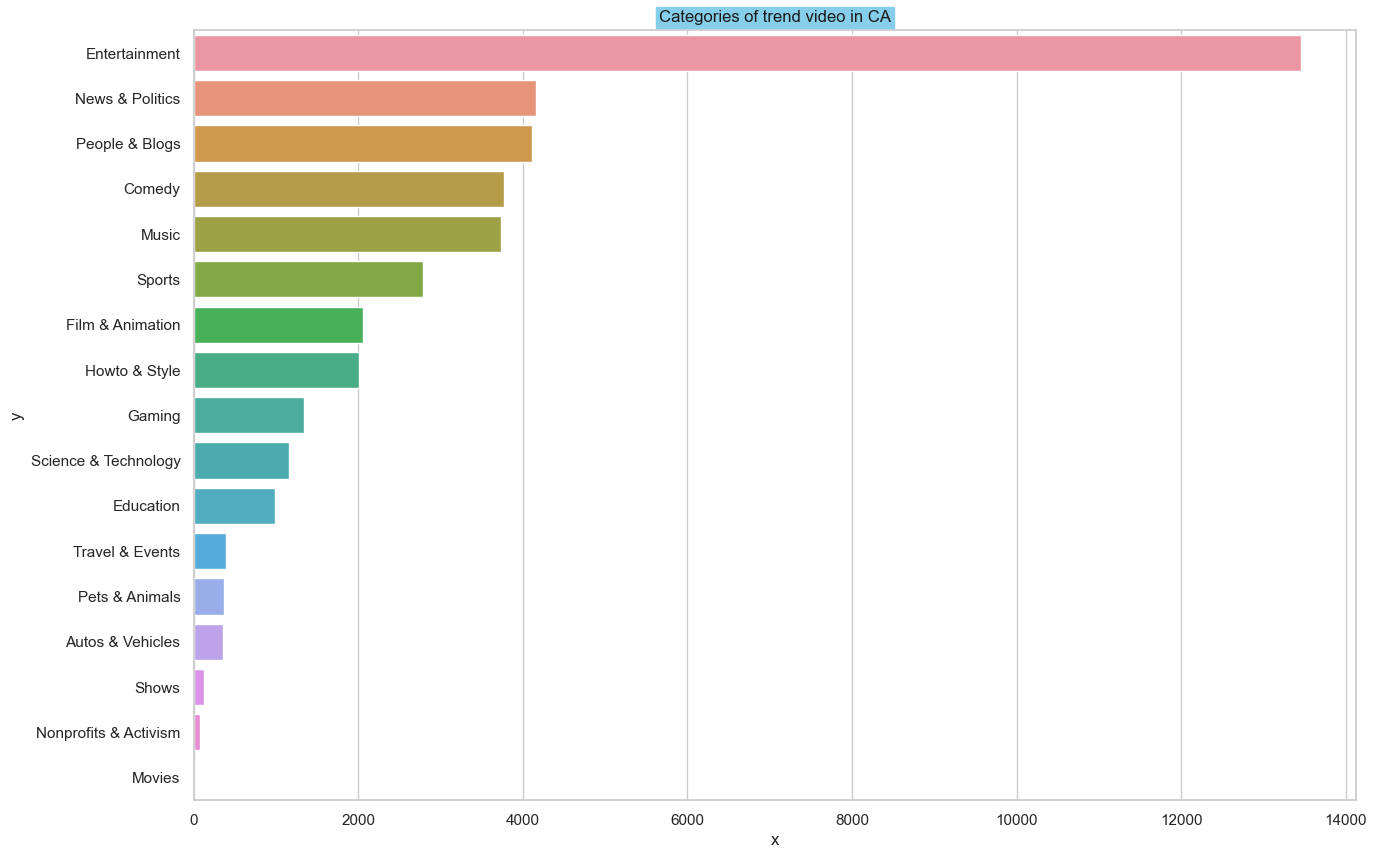

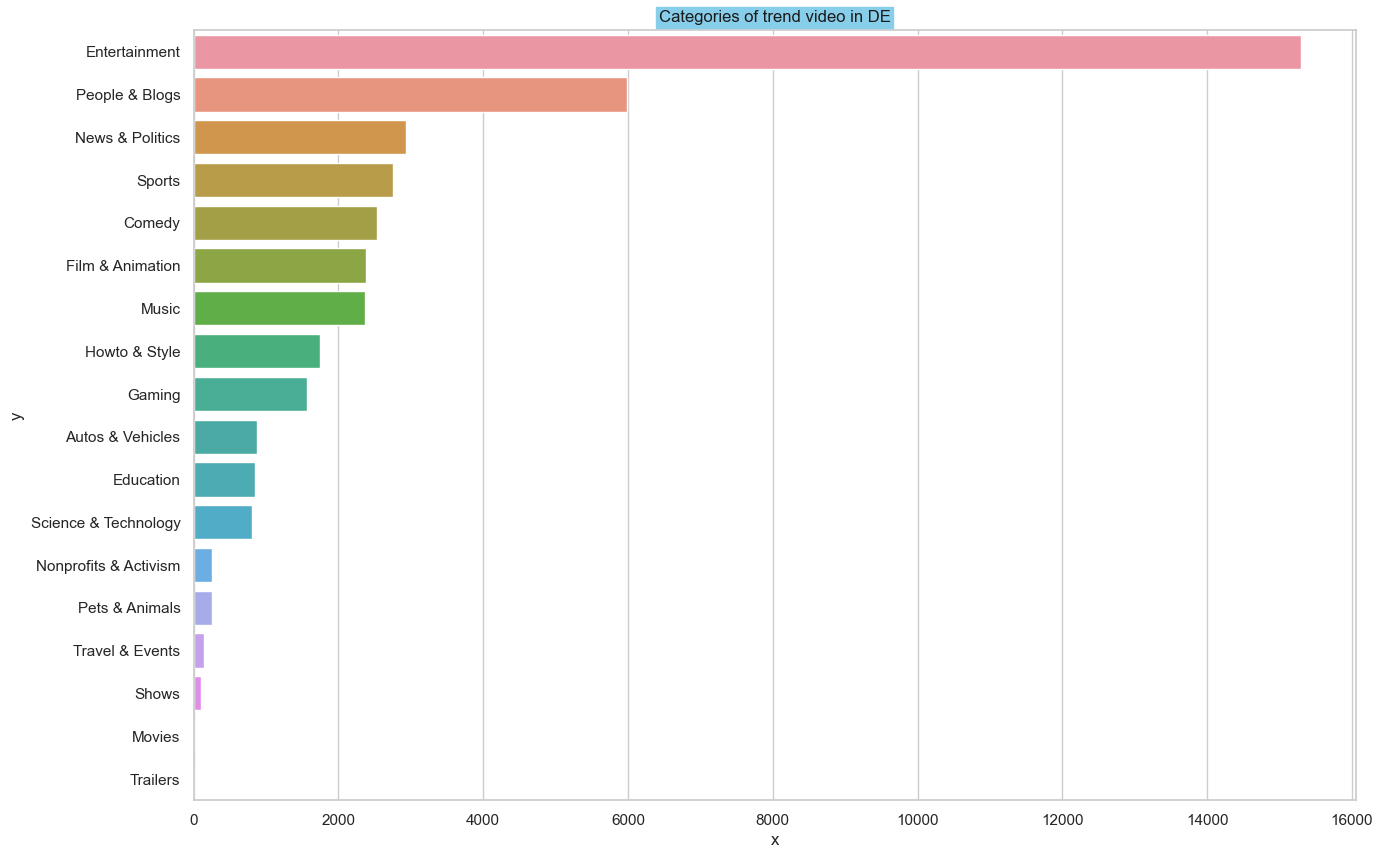

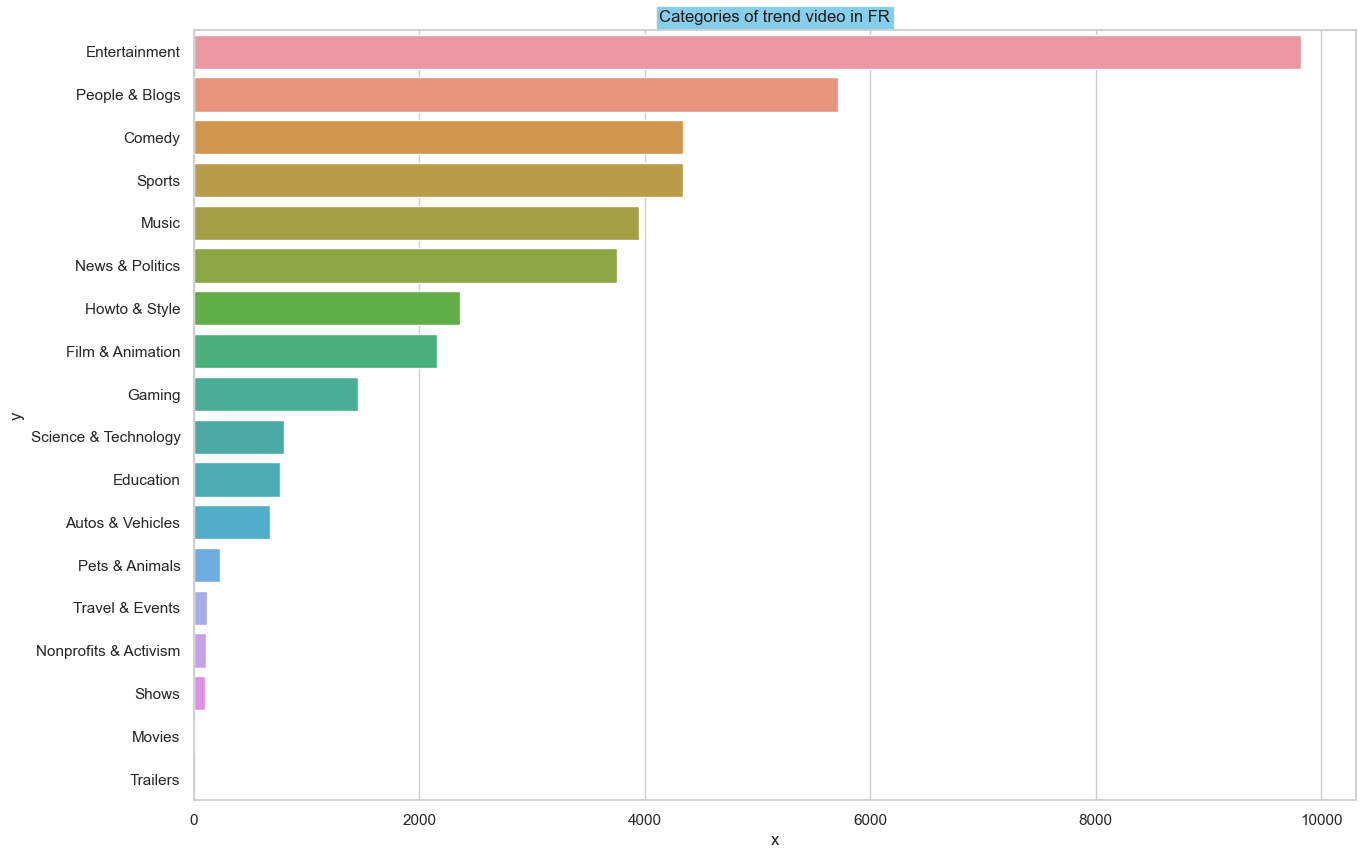

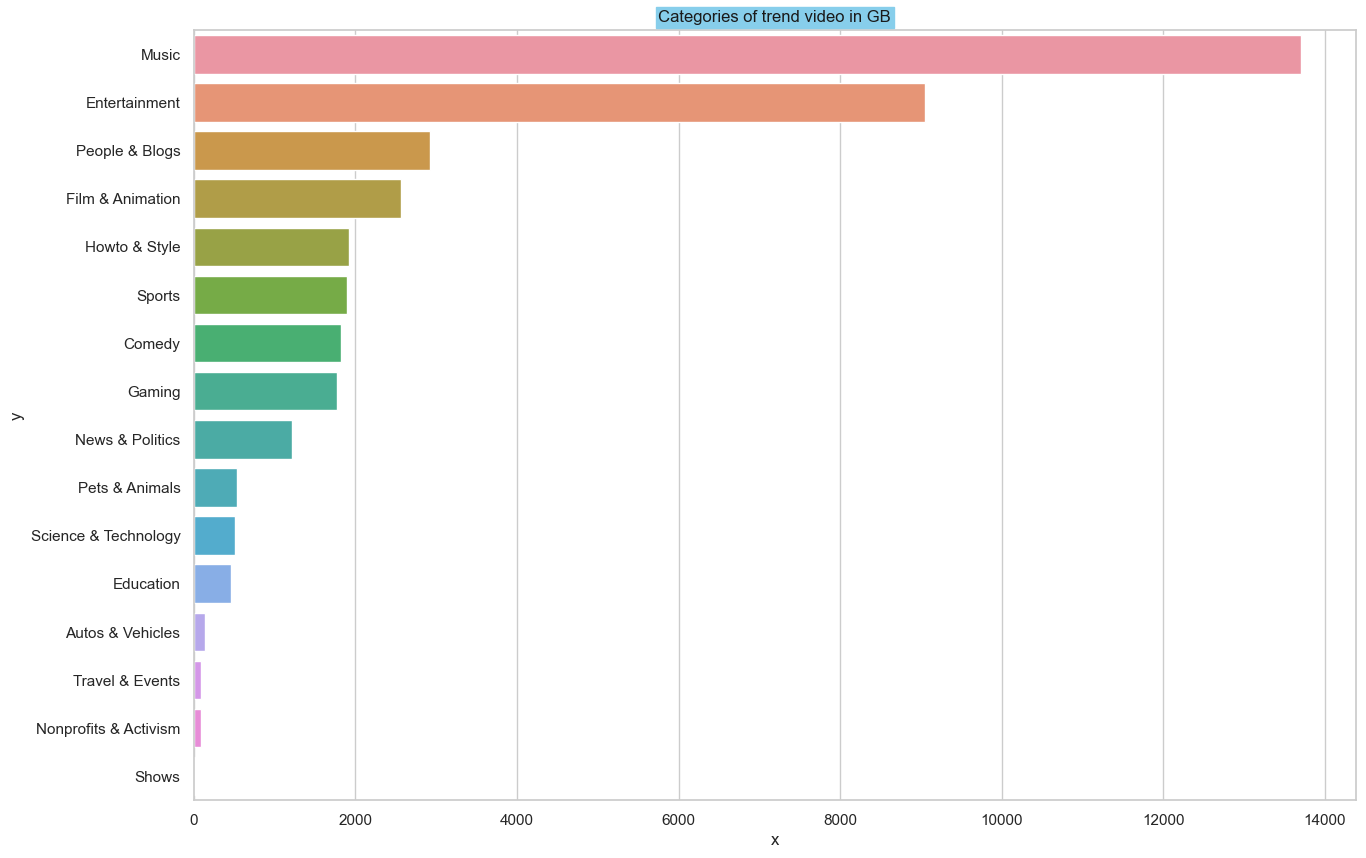

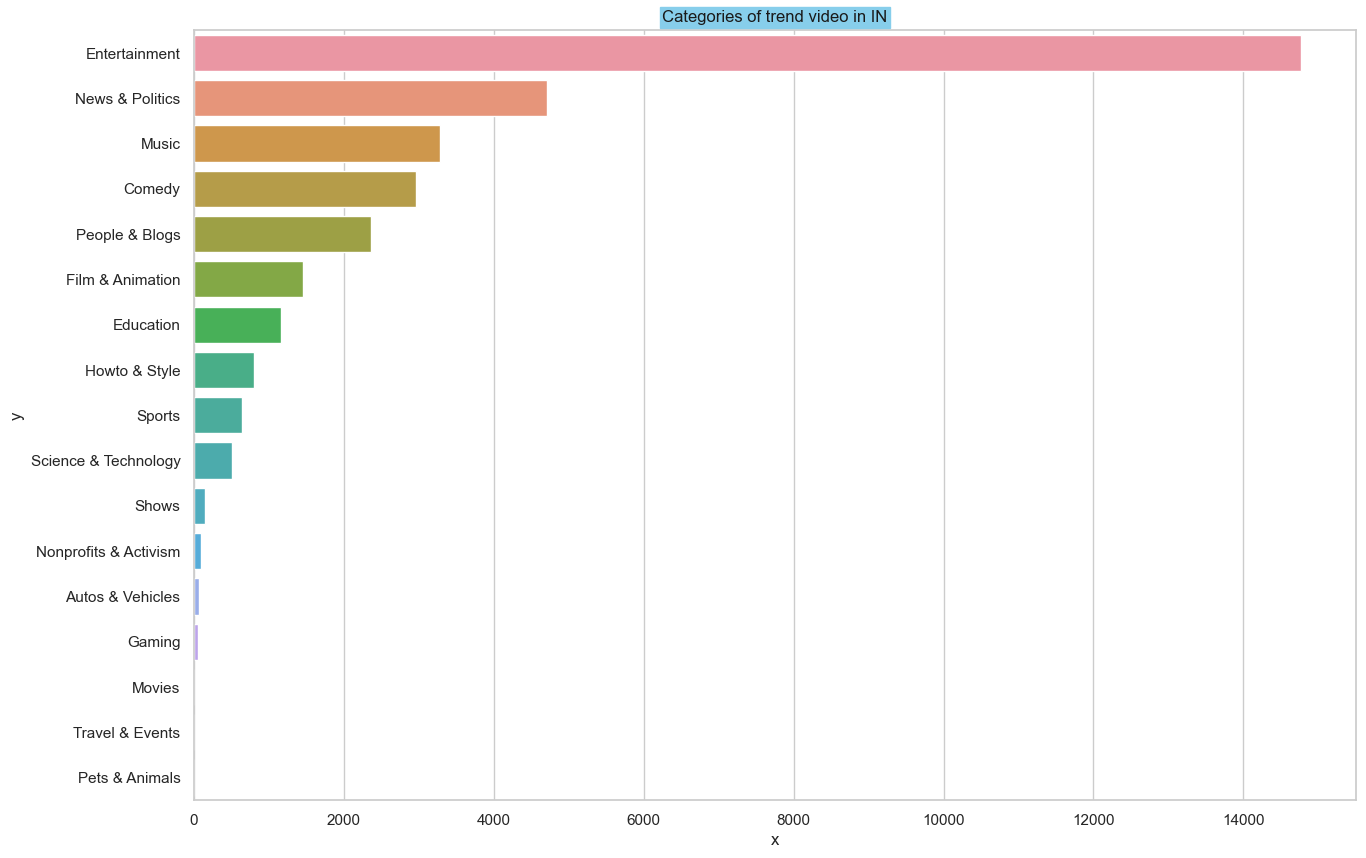

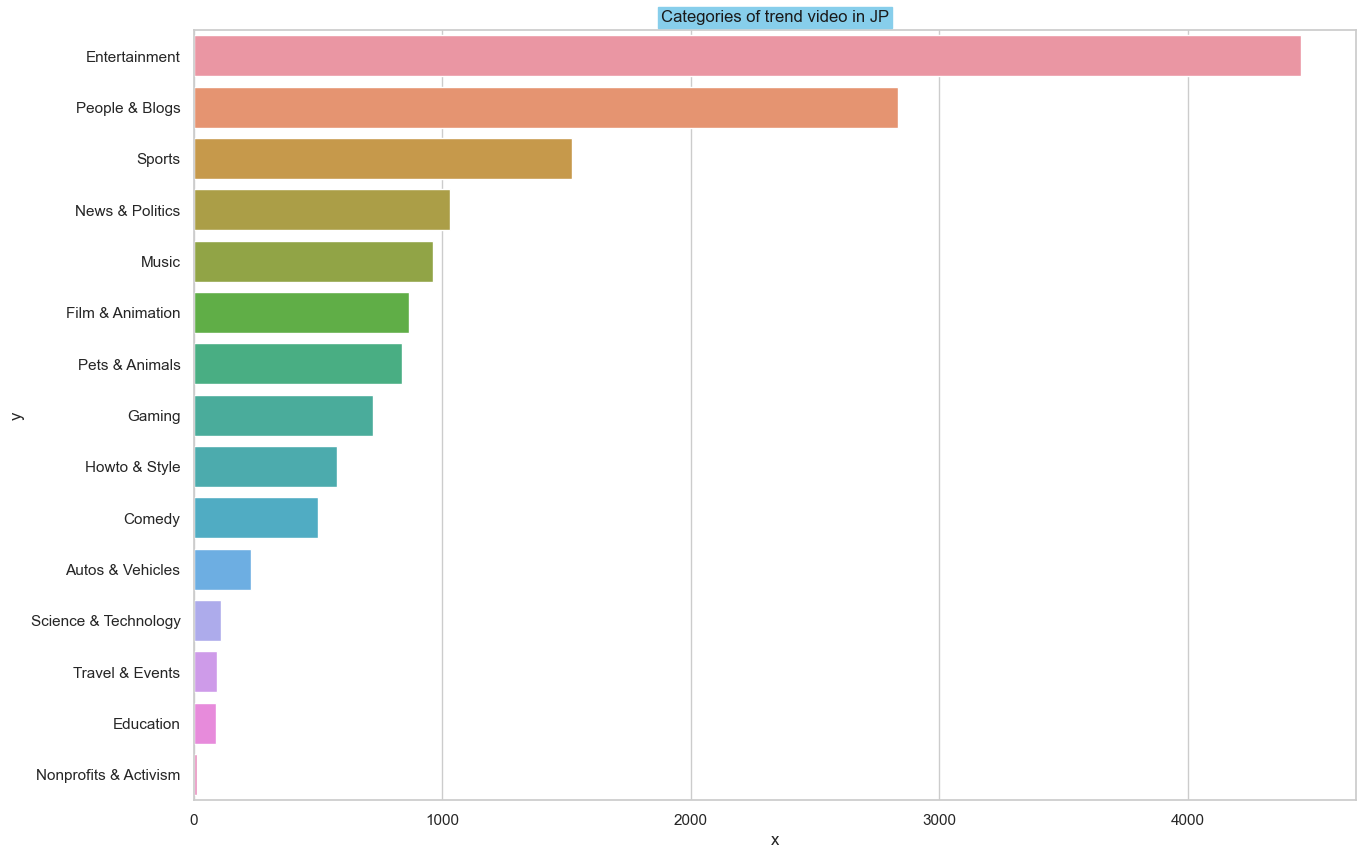

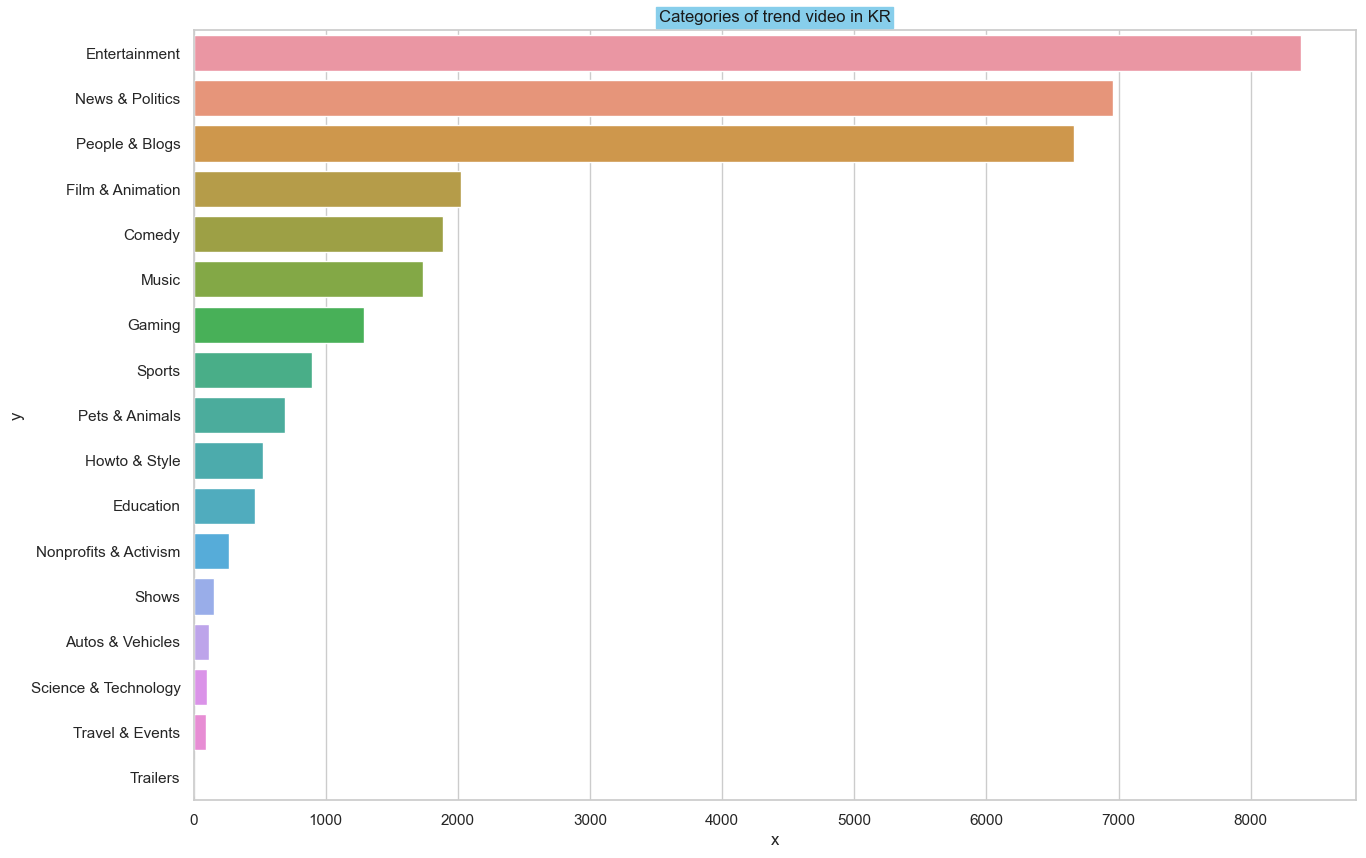

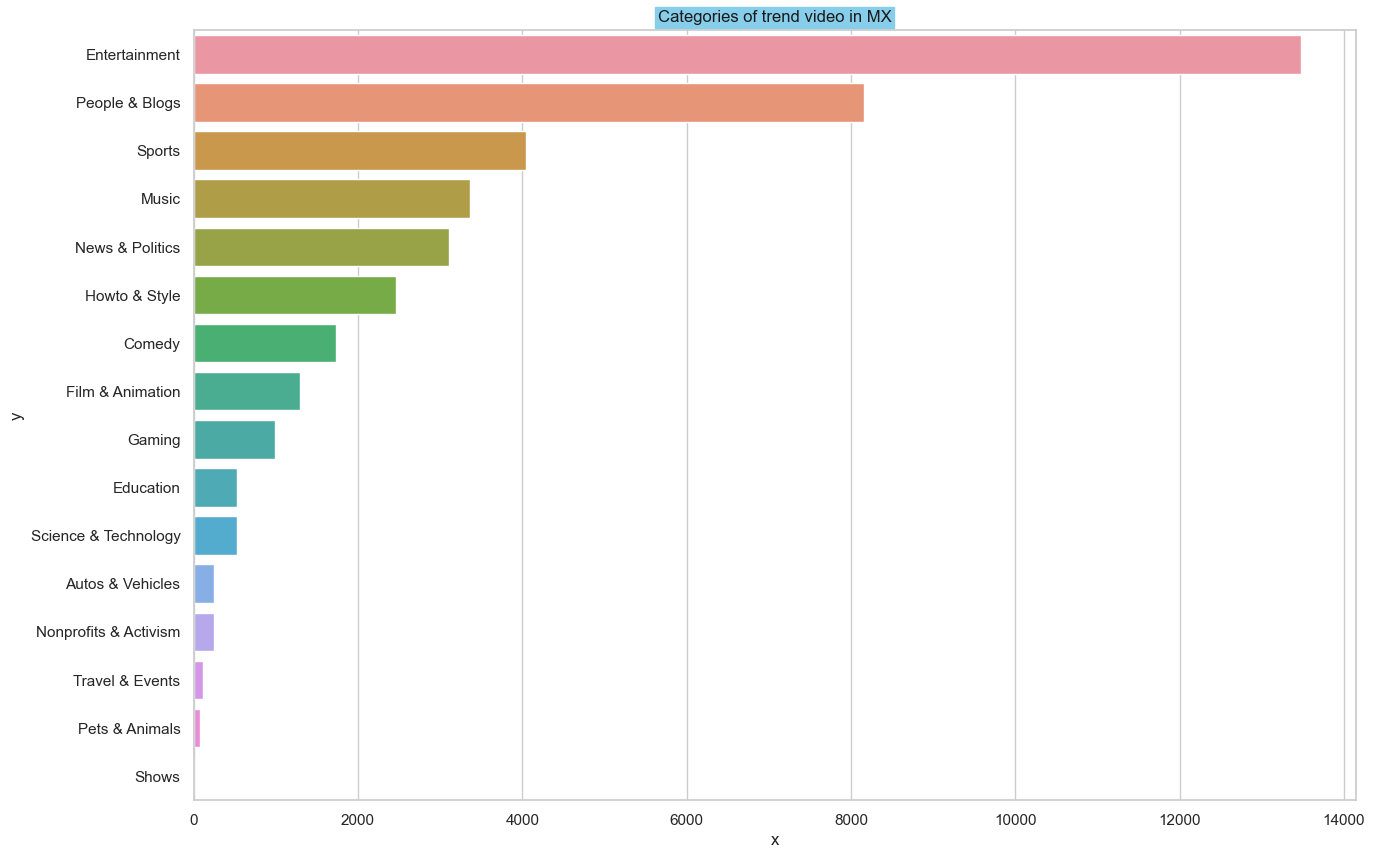

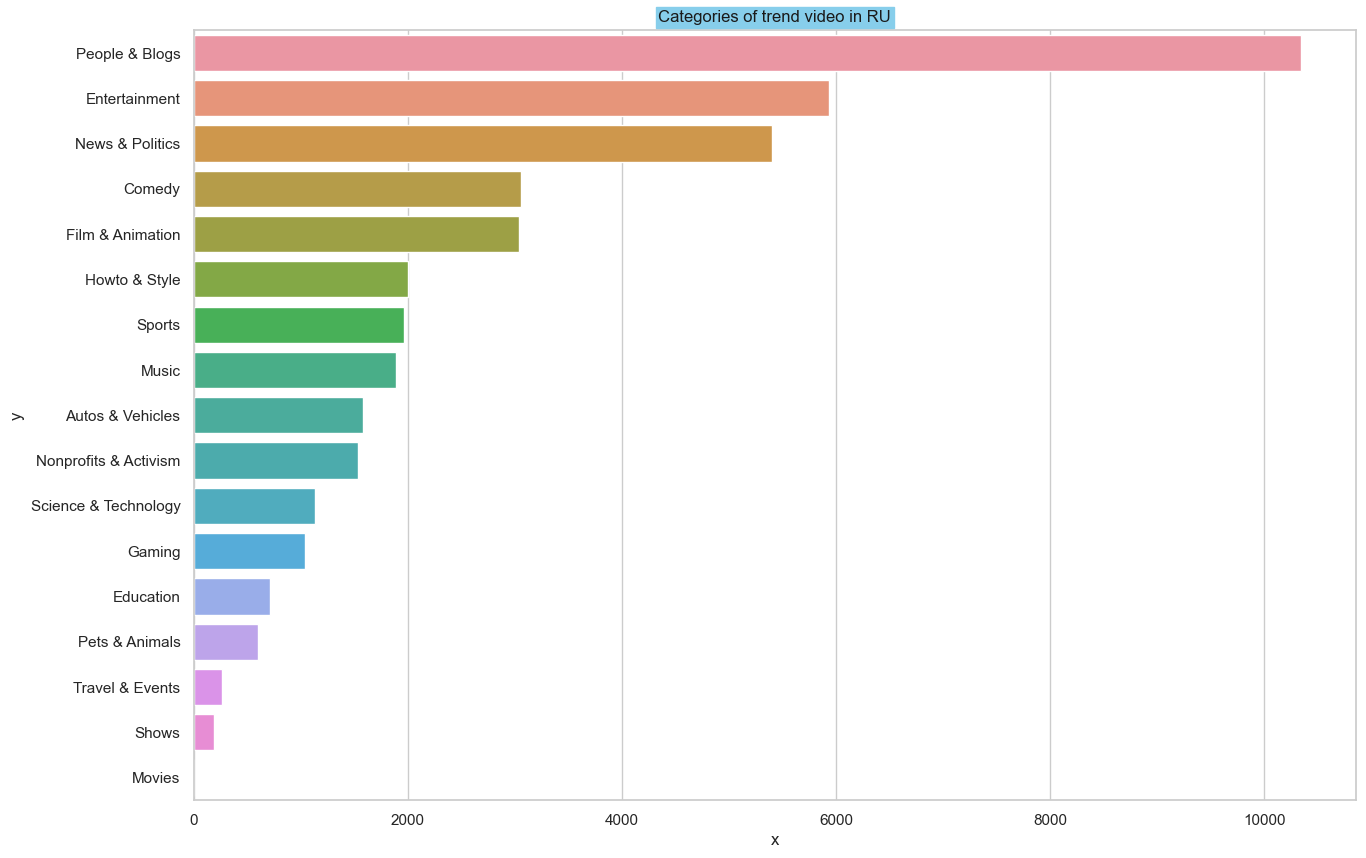

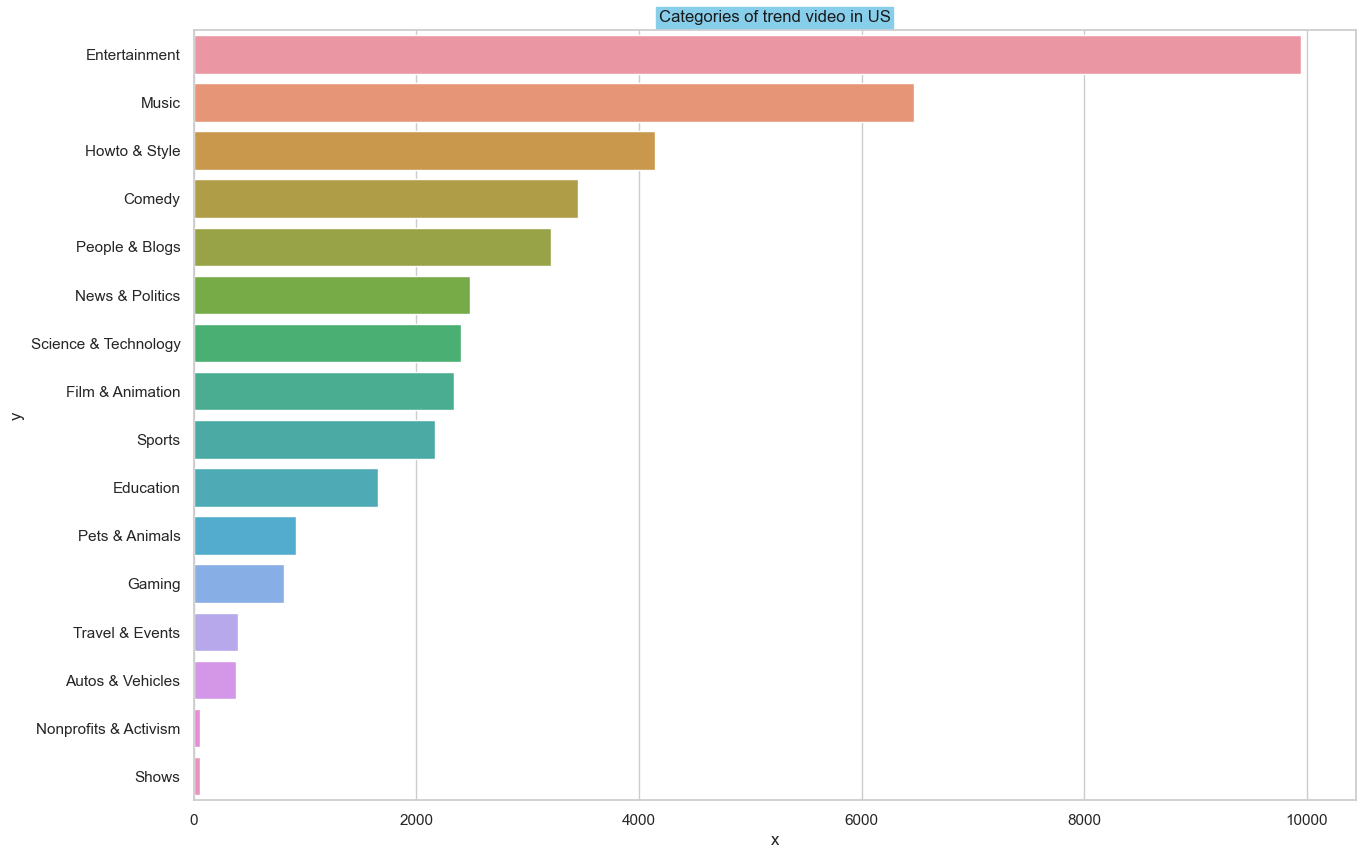

In [162]:

def barh(x,y,title,x_lable="",y_lable=""):
    mpl.figure(figsize=(15,10))
    sb.set_style("whitegrid")
    a=sb.barplot(x=y,y=x).set_title(title, fontdict=title_style)
    #a=sb.barplot(data=ndf,y=group_col,x=numeric_col)
    mpl.xlabel(x_lable)
    mpl.ylabel(y_lable)
    mpl.title(title)

for c in df['Country'].unique():
    country_df=df.loc[(df['Country']==c)]["Category"].value_counts()
    title="Categories of trend video in "+ c
    
    barh(country_df.index,country_df.values,title,"x",'y')
    
    

### Categories where people more engaged

<Figure size 1300x400 with 0 Axes>

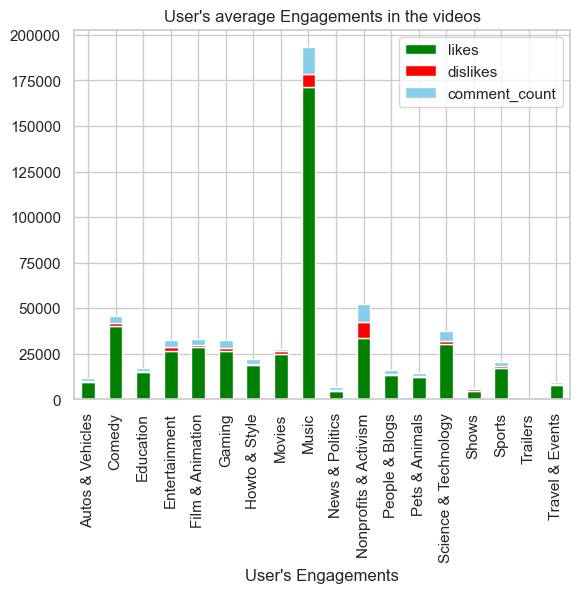

In [163]:
mpl.figure(figsize=(13,4))
# ndf = df.groupby('Category')['views', 'likes', 'dislikes', 'comment_count'].mean()
# ndf.plot(kind='bar',stacked=True, color=['skyblue','green','red','pink'])
mdf = df.groupby('Category')['likes', 'dislikes', 'comment_count'].mean()
mdf.plot(kind='bar',stacked=True, color=['green','red','skyblue'])

mpl.xlabel("User's Engagements")
mpl.title("User's average Engagements in the videos")
mpl.show()
#sb.heatmap(average_engagement)

### Country where people more engaged to watch videos

<Figure size 1300x400 with 0 Axes>

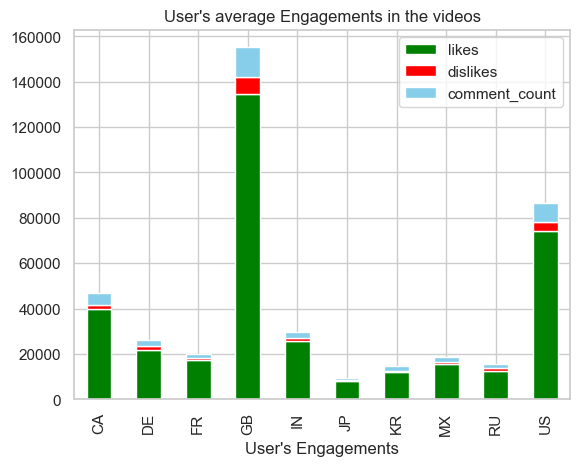

In [164]:
mpl.figure(figsize=(13,4))

mdf = df.groupby('Country')['likes', 'dislikes', 'comment_count'].mean()
mdf.plot(kind='bar',stacked=True, color=['green','red','skyblue'])
mpl.xlabel("User's Engagements")
mpl.title("User's average Engagements in the videos")
mpl.show()